# Food Nutrients: An Unsupervised Learning 

<img align="center" src="Food_Nutrients.png" width=900, height=200>

## Table of Contents

**0. Overview and Background**
   
   0.1. *An Overview of the Problem* <br>
   0.2. *The Raw Data* <br>
   0.3. *Software and Packages*
   
**1. Importing and Cleaning the Raw Data**

   1.1. *Importing Necessary Python Libraries* <br>
   1.2. *Importing the Raw Data* <br>
   1.3. *Cleaning the Raw Data*
   
**2. Exploratory Data Analysis**

   2.1. *Distribution Form of Continuous Features* <br>
   2.2. *Extracting Other Useful Information* <br>
   
**3. Data Standardization**

**4. Principal Component Analysis (PCA)**

   4.1. *Figuring out the Desired Number of Principal Components* <br>
   4.2. *Reducing to the First 10 PCA Components* <br>
   4.3. *Exploring the Properties of the New Features*
   
**5. K-Means Clustering**

   5.1. *Using the Elbow Method to Find the Optimal Number of Clusters* <br>
   5.2. *Finding the Clusters* <br>
   5.3. *Properties of the K-Means Clusters*
   
**6. Conclusions and Future Directions**

   6.1. *Conclusions* <br>
   6.2. *Possible Future Directions*

## 0. Overview and Background

### 0.1. An Overview of the Problem

-- **What is the problem?**

We focus on a large number of food items ($8618$ items) and their different food nutrients ($23$ nutrients). Our goal in this project is twofold. First, we desire to only focus on a smaller subset of the food nutrients. Not all of the food ingredients are equally important. Using PCA, we would like to find a subset of the $23$ nutrients which is responsible for the major part of the variation in the food nutrients. Second, after reducing the number of features (*i.e.* food nutrients), we would like to classify the $8618$ food items into a number of clusters, using k-means clustering algorithm.     

-- **Metrics of Success**

In this project, we aim to achieve the following goals:

   1. *Reducing the number of food ingredients*: Using PCA, we reduce the number of features (food nutrients in this context) to a smaller subset so that the a large portion of variance is still captured.
   2. *Understanding the properties of the new features*: Each new feature will be a linear combination of the old features. We would like to obtain a qualitative understanding of the new features. For instance, we would like to understand that what old features vary most for each new feature.    
   3. *Clustering the food items*: After reducing the number of features (through the PCA algorithm), we intend to classify the food items into a number of clusters, using the k-means algorithm approach.
   4. *Understanding the properties of the clusters*: We would like to obtain a good understanding of the clusters. Among many factors, we intend to determine the size of each cluster, the food items in each cluster, and whether or not some clusters will be more significant than others.

**-- Why is this project important?**

Most people know good nutrition and physical activity can help maintain a healthy weight. But the benefits of good nutrition go beyond just weight. Having a good understanding of the nutrition factors and applying this knowledge in decision making when it comes to foods can have an immense impact in one's physical and mental health. However, the problem is that there are too many food items and too many food nutrients! Also, not all nutrients are on equal footing! Therefore, picking the most relevant factors and classifying the food items according to picked nutrients is of vital importance.

**-- Who might be interested?**

 1. *Individuals who seek a healthy diet, and are interested in gaining certain food nutients:* As a side goal in this project, we have designed functions by which individuals can find answers to questions involving food nutrients. We list a couple of typical questions that can be answered in this context (these are just some typical questions, and by no means this list is exhaustive):
     - What are the 5 richest food items in zinc (or any other food nutrient considered in this project)?
     - What food items in the category of meats have the least amount of fat?
     - What breakfast cereals have the least amount sugar?
  
 2. *Food companies:* Food companies are interested in food nutrients of food items, and the findings in here may be relevant in decision making for including/excluding certain food ingredients based on the containing nutrients.
 
 3. *Food control units:* Food control units may be interested in different ways of classifying and clustering food items based on their containing nutrients.
 
 4. *Food regulatory and legislative agencies:* The agencies that are responsible for making food policies and setting the food standards may be interested in different ways of classifying and clustering food items based on their containing nutrients. 

**-- Previous research on the subject**

This elementary project is limited in its scope, the input data and the applied methods. The main purpose of this study is to practice some of the common techniques in data analysis and modeling. A much more comprehensive approach to food classifications (based on food nutrients) can, for instance, be found at FDA website.     

### 0.2. The Raw Data

**-- Who collected the original data**

The original data has been collected and published by USDA (**U.S. Department of Agriculture**). This dataset is freely available at USDA website (see the link below). This data (which is available in txt format) has been converted to tabular format by **data.world** and is freely available as a csv file (see the link below).

**-- When is the data collected?**

The latest version of the dataset (which has been used in this project) has been published at UDSA website in **May $2016$**.

**-- Characteristics of the Dataset**

The latest version of the dataset (SR28) has been converted to a single *csv file* (of 3.76 MB size) by  **data.world**, and this is the version we will be using in this project. The tabular data has $8618$ rows and $45$ columns (corresponding to the $45$ features). The data has missing values in only 3 columns that collect scientific names of the food items and these variables will play no role in our analysis. 

**-- Links to Data Resources**

  1. The original USDA dataset can be found at https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/methods-and-application-of-food-composition-laboratory/mafcl-site-pages/  *under SR11-SR28* (choose SR28 the latest release).
  
  2. The converted csv file can be found in **data.world** at https://data.world/craigkelly/usda-national-nutrient-db. To access the csv file, click on nndb_flat.csv at the bottom of the page.
  
  3. A pdf file sr28_doc.pdf (created by USDA) is available at author's Github link if one desires to obtain a deeper understanding of the variables/features and how they were collected. 

**-- Connection**

The csv file nndb_flat.csv will be our input data for this project. The study will be an unsupervised learning. Out of $45$ features, as we will see, $4$ categorical and $23$ continuous features (food nutrients) will be relevant in this project.   

### 0.3. Software and Packages

We will use the following python libraries:

   - For data wrangling, we use the standard *pandas* and *numpy* libraries.
   - For data visualization and plotting, we use the standard *matplotlib* and *seaborn* libraries.
   - For implementing data standardization, PCA and KMeans clustering, we use several components of *scikit learn* library.
   - For the implementation of the Elbow Method (in order to figure out the optimal number of k-means clusters), we use the *yellowbrick* library.

## 1. Importing and Cleaning the Raw Data

### 1.1. Importing Necessary Python Libraries

In [2]:
# Importing the common libraries for data wrangling and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing the defined (utility) functions relevant for this project 

import functions

In [4]:
# Importing several components of the scikit-learn library to perform pca and k-means clustering

from sklearn.preprocessing import StandardScaler     # used for standardizing the data
from sklearn.decomposition import PCA                # used for pca 
from sklearn.cluster import KMeans                   # used for K-Means clustering 
from yellowbrick.cluster import KElbowVisualizer     # used for finding the optimal numebr of clusters

### 1.2. Importing the Raw Data

In [5]:
# Specifying the local path to the csv source file

path='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/Final-Project/nndb_flat.csv'

In [6]:
# Reading the csv source file into a dataframe

Food_df=pd.read_csv(path)

In [7]:
# The shape of the dataframe

Food_df.shape

(8618, 45)

__Note:__

The dataframe 'Food_df' has **45 features** and **8618 food items**. 

### 1.3. Cleaning the Raw Data

In [8]:
# A sample of 3 rows of the Food_df dataframe 

Food_df.sample(3)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
830,5032,Poultry Products,"CHICKEN,BROILERS OR FRYERS,LT MEAT,MEAT&SKN,CK...","Chicken, broilers or fryers, light meat, meat ...",NaN,NaN,NaN,222.0,29.02,10.85,...,0.0075,0.695875,0.090769,0.050000,0.012500,0.000059,0.059524,0.285714,0.438182,0.111818
6992,22906,"Meals, Entrees, and Side Dishes","CHICKEN POT PIE,FRZ ENTREE,PREP","Chicken pot pie, frozen entree, prepared",NaN,NaN,NaN,204.0,5.11,11.85,...,0.1250,0.116937,0.031538,0.086667,0.016667,0.000047,0.026190,0.102857,0.098182,0.038182
3330,11653,Vegetables and Vegetable Products,"BEANS,PINTO,MATURE SEEDS,SPROUTED,RAW","Beans, pinto, mature seeds, sprouted, raw",NaN,NaN,Phaseolus vulgaris,62.0,5.25,0.90,...,0.2950,0.142500,0.134615,0.191667,0.035833,0.000356,0.126190,0.134286,0.010909,0.045455


In [9]:
# Displaying the features of the Food_df dataframe

print(list(Food_df.columns.values),'\n','\n Number of features = ',len(list(Food_df.columns.values)))

['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'] 
 
 Number of features =  45


Among the above features, most of the values of the following 3 columns are missing:

* 'CommonName'
* 'MfgName'
* 'ScientificName'

The above three features do not carry any significance in our analysis, and hence we drop them.

In [10]:
# Removing the columns {'CommonName','MfgName','ScientificName'} from the list of columns and defining a new list

new_cols = list(Food_df.columns[:4]) + list(Food_df.columns[7:])

print('Number of elements of new_cols =',len(new_cols))

Number of elements of new_cols = 42


The above 42 features are divided into three categories:

- Features representing *names or ID's* of the food items. We collect these features in **'id_names'**.
- Features representing differents *nutrients* each food item may possess. We collect these features in **'Nutrients'**.
- Features representing the *USRDA* (USRDA stands for "U.S. Recommended Daily Allowances." The USRDA's were developed by the Food and Drug Administration specifically for use in nutritional labeling, which was initiated in 1972.). We collect USRDA features in **'USRDA'**.

In [11]:
# Dividing the new list of columns into 3 groups: 'id_names', 'Nutrients', 'USRDA'

id_names=[]; Nutrients=[]; USRDA=[];

for col in new_cols:
    if col.find('USRDA')!= -1:
        USRDA.append(col)
    elif col.find('kcal')!=-1 or col[-1]=='g':
        Nutrients.append(col)
    else:
        id_names.append(col)

print(' Number of id_names elements =',len(id_names),'\n','Number of Nutrients elements ='
      ,len(Nutrients),'\n','Number of USRDA elements =',len(USRDA))

 Number of id_names elements = 4 
 Number of Nutrients elements = 23 
 Number of USRDA elements = 15


According to https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-7/, each USRDA value only determines how much of a certain nutrient must be consumed daily by different age/gender groups for a healthy life. In this project, we are only interested in the amount of certain nutrients that each food item contains. Hence, we drop the USRDA columns from 'Food_df', and we store the result in a new dataframe called 'new_df'.  

In [12]:
# Creating a new dataframe ('new_df') with only 'id_names' and 'Nutrients'

new_df = Food_df.drop(Food_df.columns[4:7], axis=1).drop(USRDA, axis=1)
new_df.sample(3)

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
6027,19035,Snacks,"SNACKS,POPCORN,OIL-POPPED,MICROWAVE,REG FLAVOR...","Snacks, popcorn, oil-popped, microwave, regula...",583.0,7.29,43.55,45.06,0.46,8.1,...,0.057,0.134,4.0,0.162,1.98,79.0,0.629,199.0,2.2,3.10
4202,14068,Beverages,"BEVERAGES,KELLOGG'S SPL K20,PROT H2O MIX","Beverages, KELLOGG'S SPECIAL K20, protein wate...",380.0,35.20,0.60,58.40,2.00,37.5,...,0.000,0.000,115.0,0.000,2.00,7.0,0.000,69.0,0.0,0.00
6612,21014,Fast Foods,"FAST FOODS,CROISSANT,W/EGG,CHS,&SAUSAGE","Fast foods, croissant, with egg, cheese, and s...",308.0,12.09,21.78,15.90,3.12,1.8,...,0.370,0.237,90.0,0.070,1.65,17.0,0.184,138.0,24.8,1.14


In [13]:
# Confirming that there is no missing values in the new dataframe 'new_df'

missing_values=[]
for col in new_df.columns:
    missing_values.append(new_df[new_df[col].isna()])

pd.concat(missing_values)

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg


## 2. Exploratory Data Analysis

In this section, we carry out the exploratory data analysis of the clean data stored in 'new_df' in the previous section.

### 2.1. Distribution Form of Continuous Features 

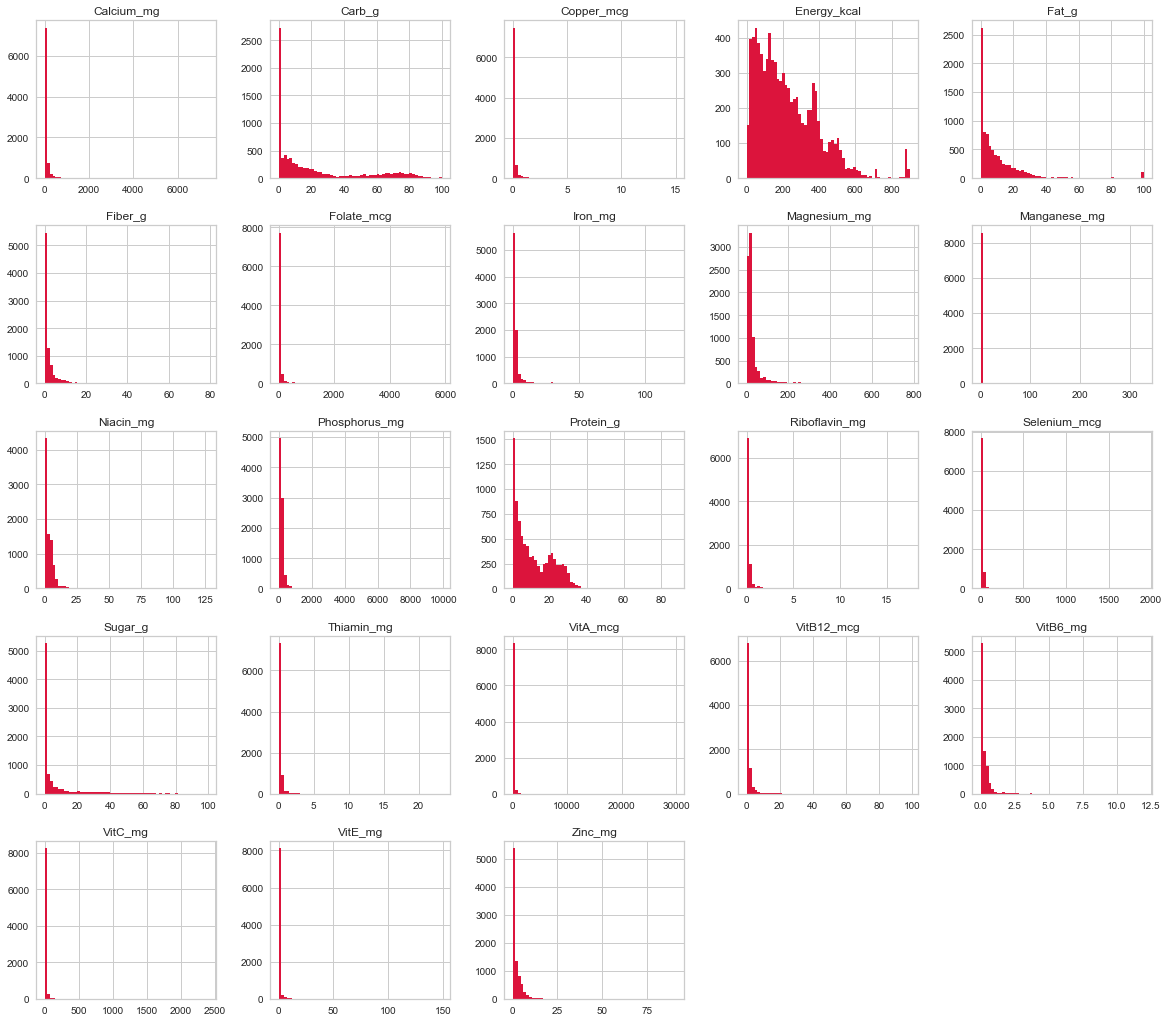

In [14]:
# Plotting the histogram of all 23 nutrients of the dataframe 'new_df' 

new_df[Nutrients].hist(bins=60, figsize=(20,18),color='crimson') 
plt.show()

__Observations:__

As observed from the above histograms, the distributions of most of the nutrients are heavily populated around very small values (close to 0). This highly skewed behavior is due to the fact that most of the food items are rich in *only very few nutrients*, and *very poor in terms of the rest of the nutrients*. Let us examine the dataframe and figure out the food items that rich in some of the nutrients. To obtain a better understanding of the distributions, we investigate the distribution of *Manganese*, *Selenium*, and *vitamin E*.

**Manganese**

We find the 5 food items with highest level of Manganese. 

In [15]:
# Finding the foods with 5 largest level of Manganese(mg)

functions.N_largest(new_df,5,'Manganese_mg')

,ID,FoodGroup,ShortDescrip,Descrip,Manganese_mg
7457,23424,Beef Products,"BEEF,NZ,IMP,LIVER,CKD,BLD","Beef, New Zealand, imported, liver, cooked, bo...",328.0
7458,23425,Beef Products,"BEEF,NZ,IMP,LIVER,RAW","Beef, New Zealand, imported, liver, raw",299.0
4190,14055,Beverages,"BEVERAGES,UNILEVER,SLIMFAST SHAKE MIX,HI PROT,...","Beverages, UNILEVER, SLIMFAST Shake Mix, high ...",269.1
4335,14353,Beverages,"TEA,INST,UNSWTND,PDR,DECAFFEINATED","Tea, instant, unsweetened, powder, decaffeinated",133.0
4339,14366,Beverages,"TEA,INST,UNSWTND,PDR","Tea, instant, unsweetened, powder",133.0


As observed above, the difference between Manganese level in the 1st and 5th richest five items (among 8618 items) is around 200 mg! This shows that except for very few food items that are rich in Manganese, most of the food items contain a negligible amount of Manganese. We can explore this in a greater detail below: 

In [16]:
# Finding the number of food items with Manganese level greater/lower than 40 mg

print('Number of food ingredients with Manganese level greater than 40 mg ='
      ,functions.number_of_greater_a(new_df,'Manganese_mg',40),'\n')
print('Number of food ingredients with Manganese level less than 40 mg ='
      ,functions.number_of_smaller_a(new_df,'Manganese_mg',40))

Number of food ingredients with Manganese level greater than 40 mg = 11 

Number of food ingredients with Manganese level less than 40 mg = 8607


Out of 8618 considered food items, only 11 food items have a Manganese level obove 40 mg. The rest of the items (8607 items) contain either a very poor or no amount of Manganese.   

**Selenium**

We find the 5 food items with highest level of Selenium. 

In [17]:
# Finding the foods with 5 largest level of Selenium(mcg)

functions.N_largest(new_df,5,'Selenium_mcg')

,ID,FoodGroup,ShortDescrip,Descrip,Selenium_mcg
3672,12078,Nut and Seed Products,"BRAZILNUTS,DRIED,UNBLANCHED","Nuts, brazilnuts, dried, unblanched",1917.0
8262,35226,American Indian/Alaska Native Foods,"SEA LION,STELLER,LIVER (ALASKA NATIVE)","Sea lion, Steller, liver (Alaska Native)",693.0
3761,12638,Nut and Seed Products,"NUTS,MXD NUTS,OIL RSTD,WO/ PNUTS,W/ SALT ADDED","Nuts, mixed nuts, oil roasted, without peanuts...",421.5
2616,10107,Pork Products,"PORK,FRSH,VAR MEATS&BY-PRODUCTS,KIDNEYS,CKD,BRSD","Pork, fresh, variety meats and by-products, ki...",311.5
8263,35227,American Indian/Alaska Native Foods,"SEA LION,STELLER,KIDNEY (ALASKA NATIVE)","Sea lion, Steller, kidney (Alaska Native)",274.0


As observed above, the difference between Selenium level in the 1st and 5th richest five items (among 8618 items) is already more than 1600 mcg! This shows that except for very few food items that are rich in Selenium, most of the food items contain a negligible amount of Selenium. We can explore this in a greater detail below: 

In [18]:
# Finding the number of food items with Selenium level greater/lower than 30 mcg

print('Number of food ingredients with Selenium level greater than 30 mcg ='
      ,functions.number_of_greater_a(new_df,'Selenium_mcg',30),'\n')
print('Number of food ingredients with Selenium level less than 30 mcg ='
      ,functions.number_of_smaller_a(new_df,'Selenium_mcg',30))

Number of food ingredients with Selenium level greater than 30 mcg = 1117 

Number of food ingredients with Selenium level less than 30 mcg = 7487


Out of 8618 considered food items, around 1/8 of the food items have a Selenium level obove 30 mcg. The rest of the items (around 7/8 of the total food items) contain either a very poor or no amount of Selenium. 

**Vitamin E**

We find the 5 food items with highest level of vitamin E. 

In [19]:
# Finding the foods with 5 largest level of vitamin E(mg)

functions.N_largest(new_df,5,'VitE_mg')

,ID,FoodGroup,ShortDescrip,Descrip,VitE_mg
632,4038,Fats and Oils,"OIL,WHEAT GERM","Oil, wheat germ",149.40
2025,8504,Breakfast Cereals,"CEREALS RTE,RALSTON ENR WHEAT BRAN FLAKES","Cereals ready-to-eat, RALSTON Enriched Wheat B...",80.46
2068,8590,Breakfast Cereals,"CEREALS RTE,KASHI HEART TO HEART,WARM CINN","Cereals ready-to-eat, KASHI HEART TO HEART, Wa...",61.00
1989,8387,Breakfast Cereals,"CEREALS RTE,KASHI HEART TO HEART,HONEY TSTD OAT","Cereals ready-to-eat, KASHI HEART TO HEART, Ho...",60.97
4184,14047,Beverages,"BEVERAGES,UNILEVER,SLIMFAST SHAKE MIX,PDR,3-2-...","Beverages, UNILEVER, SLIMFAST Shake Mix, powde...",51.92


As observed above, the difference between vitamin E level in the 1st and 5th richest five items (among 8618 items) is around 100 mg! This shows that except for very few food items that are rich in vitamin E, most of the food items contain a negligible amount of vitamine E. We can explore this in a greater detail below: 

In [20]:
# Finding the number of food items with vitamin E level greater/lower than 2 mg

print('Number of food ingredients with Vitamin-E level greater than 2 mg ='
      ,functions.number_of_greater_a(new_df,'VitE_mg',2),'\n')
print('Number of food ingredients with Vitamin-E level less than 2 mg ='
      ,functions.number_of_smaller_a(new_df,'VitE_mg',2))

Number of food ingredients with Vitamin-E level greater than 2 mg = 612 

Number of food ingredients with Vitamin-E level less than 2 mg = 8002


Out of 8618 considered food items, only 612 food items have a vitamin E level obove 2 mg. The rest of the items (8002 items) contain either a very poor or no amount of vitamin E.  

### 2.2. Extracting Other Useful Information

The above dataframe can be used to extract other useful information about food items in regard to whether they should/could/better be included in one's diet. For instance, if one is interested in breakfast cereals with the lowest amount of containing fat, one can easily extract the relevant information from 'new_df' dataframe.

In [21]:
# The 5 lowest nonzero level of 'Fat_g' in the food category 'Breakfast Cereals' 

functions.N_nonzero_smallest(new_df,5,'Fat_g','Breakfast Cereals')

,ID,FoodGroup,ShortDescrip,Descrip,Fat_g
2032,8511,Breakfast Cereals,"CEREALS,MALT-O-MEAL,ORIGINAL,PLN,PREP W/ H2O,W...","Cereals, MALT-O-MEAL, original, plain, prepare...",0.07
1879,8101,Breakfast Cereals,"CEREALS,CRM OF RICE,CKD W/H2O,WO/SALT","Cereals, CREAM OF RICE, cooked with water, wit...",0.10
1913,8168,Breakfast Cereals,"CEREALS,CREAM OF RICE,CKD W/ H2O,W/ SALT","Cereals, CREAM OF RICE, cooked with water, wit...",0.10
2033,8512,Breakfast Cereals,"CEREALS,MALT-O-MEAL,CHOC,PREP W/ H2O,WO/ SALT","Cereals, MALT-O-MEAL, chocolate, prepared with...",0.10
2054,8574,Breakfast Cereals,"CEREALS,CRM OF WHT,2 1/2 MIN CK,CKD W/H2O,STOV...","Cereals, CREAM OF WHEAT, 2 1/2 minute cook tim...",0.20


Similarly, if one is interested in breakfast cereals with the lowest amount of containing sugar, one can easily extract the relevant information from 'new_df' dataframe.

In [22]:
# The 5 lowest nonzero level of 'Sugar_g' in the food category 'Breakfast Cereals' 

functions.N_nonzero_smallest(new_df,5,'Sugar_g','Breakfast Cereals')

,ID,FoodGroup,ShortDescrip,Descrip,Sugar_g
1881,8103,Breakfast Cereals,"CEREALS,CRM OF WHEAT,REG (10 MINUTE),CKD W/ H2...","Cereals, CREAM OF WHEAT, regular (10 minute), ...",0.03
1914,8169,Breakfast Cereals,"CEREALS,CRM OF WHEAT,REG (10 MINUTE),CKD W/ H2...","Cereals, CREAM OF WHEAT, regular (10 minute), ...",0.03
1879,8101,Breakfast Cereals,"CEREALS,CRM OF RICE,CKD W/H2O,WO/SALT","Cereals, CREAM OF RICE, cooked with water, wit...",0.04
1913,8168,Breakfast Cereals,"CEREALS,CREAM OF RICE,CKD W/ H2O,W/ SALT","Cereals, CREAM OF RICE, cooked with water, wit...",0.04
1885,8107,Breakfast Cereals,"CEREALS,CREAM OF WHEAT,INST,PREP W/ H2O,WO/ SALT","Cereals, CREAM OF WHEAT, instant, prepared wit...",0.07


__Side Note:__

As a side note, it is worth noticing that there exists a positive correlation between the *energy* level contained in food items and the amount of the stored fat.  

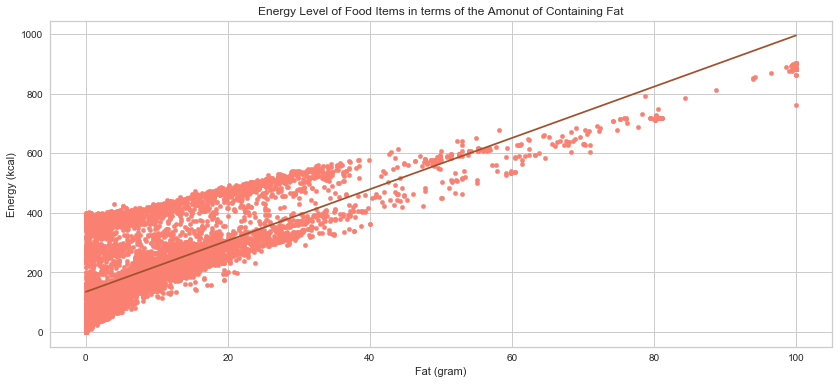

In [23]:
# A positive linear correlation between the amout of 'Fat_g' contained in food items and the level of 'Energy_kcal'

new_df.plot.scatter('Fat_g','Energy_kcal',figsize=(14,6),color='salmon')
functions.Lin_Reg(new_df.Fat_g,new_df.Energy_kcal,'sienna')
plt.title('Energy Level of Food Items in terms of the Amonut of Containing Fat')
plt.xlabel('Fat (gram)')
plt.ylabel('Energy (kcal)')
plt.show()

## 3. Data Standardization

It is crucial to standardize the data prior to applying pca, especially in the present case that food items are heavily populated around 0 in terms of the most of the nutrients. In data standardization, each value $x_i$ for a given feature is replaced by its $z$-score: $\displaystyle z_i = \frac{x_i-\mu}{\sigma}$, where $\mu$ and $\sigma$ are the mean and the standard deviation of the feature in cosideration, respectively.

In [24]:
# Standardizing the data in the 'new_df' dataframe for all numerical features (i.e. 'Nutrients')

standard_features = StandardScaler().fit_transform(new_df[Nutrients].values)

In [25]:
# Storing the standardized data in a new dataframe 'standard_df'

standard_df = pd.DataFrame(standard_features, index=new_df.index, columns=functions.remove_unit(Nutrients))
standard_df[id_names] = new_df[id_names]
standard_df = standard_df.reindex(columns = id_names + functions.remove_unit(Nutrients))

In [26]:
# A sample of the standardized dataframe 'standard_df'

standard_df.sample(3)

,ID,FoodGroup,ShortDescrip,Descrip,Energy,Protein,Fat,Carb,Sugar,Fiber,...,Riboflavin,Thiamin,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Selenium,Zinc
265,2035,Spices and Herbs,PUMPKIN PIE SPICE,"Spices, pumpkin pie spice",0.682265,-0.546343,0.123096,1.742490,0.088208,2.962095,...,-0.222846,-0.152134,3.022511,0.563847,2.970895,1.841690,2.403164,-0.187050,-0.117174,0.119054
1184,6004,"Soups, Sauces, and Gravies","SOUP,BEAN W/ PORK,CND,COND","Soup, bean with pork, canned, condensed",-0.575269,-0.534969,-0.392490,-0.178029,-0.261758,0.898767,...,-0.471816,-0.279464,-0.066606,0.231128,-0.203745,0.004543,-0.000695,-0.285532,-0.219682,-0.357418
1466,6468,"Soups, Sauces, and Gravies","SOUP,VEGETARIAN VEG,CND,PREP W/ EQ VOLUME H2O","Soup, vegetarian vegetable, canned, prepared w...",-1.171565,-1.010799,-0.621289,-0.621537,-0.366895,-0.399507,...,-0.485154,-0.362421,-0.314928,-0.211893,-0.394083,-0.530548,-0.049575,-0.699159,-0.382279,-0.530139


**Note** that each value (associated to a continuous feature) is unitless after the standardization. Therefore, the units associated with the nutrient features have been drop in the dataframe 'standard_df'.

## 4. Principal Component Analysis (PCA)

In this section, we apply the PCA method to reduce the number of Nutrients features.

### 4.1. Figuring out the Desired Number of Principal Components

In [27]:
# Instantiating PCA first in the presence of all numerical features ('Nutrients')

pca = PCA(n_components = len(Nutrients))

In [28]:
# Fitting the data to pca 

pca_data = pca.fit_transform(standard_df[functions.remove_unit(Nutrients)])

In [29]:
# Storing the transformed data in a new dataframe 'pca_df'

pca_df = pd.DataFrame(pca_data, index=new_df.index, columns=['New_Feature_{}'.format(i+1) for i 
                                                                      in range(len(Nutrients))])
pca_df[id_names] = new_df[id_names]
pca_df = pca_df.reindex(columns = id_names + ['New_Feature_{}'.format(i+1) for i in range(len(Nutrients))])

In [30]:
# A sample of 3 rows of the 'pca_df' dataframe

pca_df.sample(3)

,ID,FoodGroup,ShortDescrip,Descrip,New_Feature_1,New_Feature_2,New_Feature_3,New_Feature_4,New_Feature_5,New_Feature_6,...,New_Feature_14,New_Feature_15,New_Feature_16,New_Feature_17,New_Feature_18,New_Feature_19,New_Feature_20,New_Feature_21,New_Feature_22,New_Feature_23
4409,14601,Beverages,"TEA,RTD,UNSWTND,WENDY'S,FAST FD,WO/ ICE","Tea, ready-to-drink, unsweetened, WENDY'S, fas...",-2.234589,0.362428,1.223913,0.303424,0.234136,0.507972,...,-0.017367,-0.108785,-0.005271,-0.200231,-0.122230,0.039195,0.112493,0.144354,0.008574,0.011776
93,1105,Dairy and Egg Products,"MILK,CHOC BEV,HOT COCOA,HOMEMADE","Milk, chocolate beverage, hot cocoa, homemade",-1.351843,-0.050345,0.684822,0.358863,0.586063,0.087541,...,-0.059999,-0.080386,0.015955,-0.359284,0.104072,-0.027753,0.217618,0.113555,0.142087,0.002002
104,1116,Dairy and Egg Products,"YOGURT,PLN,WHL MILK,8 GRAMS PROT PER 8 OZ","Yogurt, plain, whole milk, 8 grams protein per...",-1.629071,0.208158,0.726241,0.166958,0.427374,0.274379,...,0.014995,-0.062668,0.006782,-0.296716,0.029385,-0.043521,0.178283,0.041497,0.120969,0.010709


In [31]:
# The 23 SVD eigenvalues:

pca.explained_variance_ratio_

array([2.36925468e-01, 1.13846015e-01, 8.83433734e-02, 8.17013669e-02,
       7.11161480e-02, 4.95813332e-02, 4.61246638e-02, 4.02719041e-02,
       3.74790508e-02, 3.58559322e-02, 3.17927198e-02, 2.59519549e-02,
       2.21153503e-02, 2.04113766e-02, 1.77385355e-02, 1.46927827e-02,
       1.43290735e-02, 1.39668837e-02, 1.11392349e-02, 1.03538827e-02,
       9.18082227e-03, 6.91711649e-03, 1.65010749e-04])

In [32]:
# A sanity check on the explained ratios of all 23 components:

pca.explained_variance_ratio_.sum()

1.0

In [33]:
 # A sanity check on the orthonormal SVD eigenvectors:
    
eigen_vec = pca.components_

orthonormal_matrix = [[int(round(np.dot(eigen_vec[i],eigen_vec[j]))) for i in range(len(Nutrients))] 
                      for j in range(len(Nutrients))]

orthonormal_matrix

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

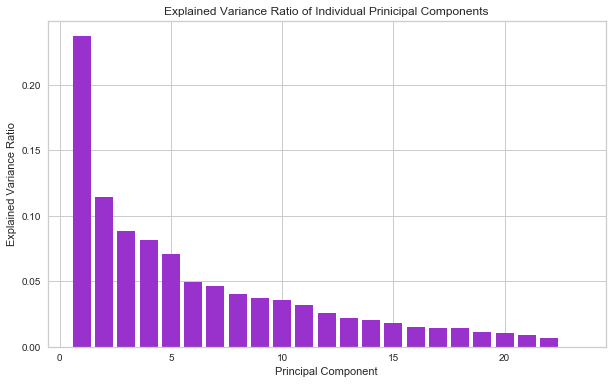

In [34]:
# Plotting explained variance ratio of the individual pca components

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(range(1,24),pca.explained_variance_ratio_,color='darkorchid')
ax.set_title("Explained Variance Ratio of Individual Prinicipal Components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
plt.show()

In [35]:
# Calculating the cumulative explained ratios of pca components

cumulative_explained_ratio = [pca.explained_variance_ratio_[:i+1].sum() for i in 
                              range(len(pca.explained_variance_ratio_))]

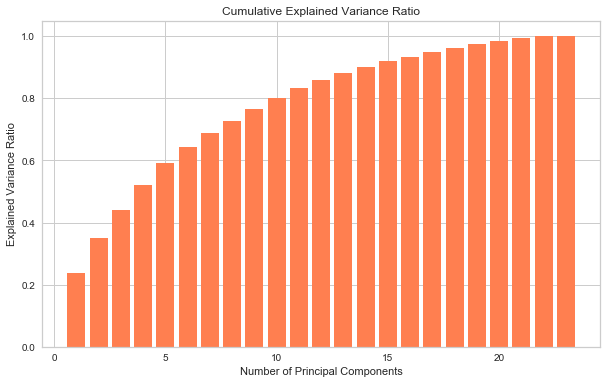

In [36]:
# Plotting cumulative explained variance ratio of the pca components

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(range(1,24),cumulative_explained_ratio,color='coral')
ax.set_title("Cumulative Explained Variance Ratio")
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Explained Variance Ratio")
plt.show()

As observed above, in order to explain 80% of the variance ratio, we need to include at least the first 10 pca components.

### 4.2. Reducing to the First 10 PCA Components

In [37]:
# Finding the number of pca components needed to explain 80% of the variance (to confirm what we concluded above)

pca = PCA(n_components = 0.8)

In [38]:
# Fitting the data to pca with only 80% of the total variance explained

pca.fit(standard_df[functions.remove_unit(Nutrients)])

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
# Printing the number of needed components to explain 80% of the total variance 

print('Number of principal components to explain 80% of variance =',len(pca.components_))

Number of principal components to explain 80% of variance = 10


In [40]:
# The SVD eigenvectors associated with the 10 largest SVD eigenvalues: 

eigen_vec = pca.components_

In [41]:
# Finding the new 10 directions corresponding to the first 10 pca components

dimensions=[]
for i in range(10):
    data = {'Nutrients':functions.remove_unit(Nutrients),'New_Feature_{}'.format(i+1):eigen_vec[i]}
    direction = pd.DataFrame(data).set_index('Nutrients')
    direction.sort_values(by='New_Feature_{}'.format(i+1), ascending=False, inplace=True)
    dimensions.append(direction)

### 4.3. Exploring the Properties of the New Features

In this section, we display the 10 directions associated with the first 10 pca components as a linear combination of the original features (i.e. 'Nutrients'), and study the most interesting properties of the new features.

#### -- New Feature 1

We explore the properties of the first most significant direction associated with the first principal component. 

In [42]:
# Displaying the first pca direction corresponding to the first pca component

dimensions[0]

,New_Feature_1
Nutrients,
Riboflavin,0.341325
Niacin,0.337779
VitB6,0.315663
Iron,0.299857
Folate,0.284102
Thiamin,0.272453
Zinc,0.243551
Magnesium,0.241348
Phosphorus,0.199403


As observed above, most of the variance along New_Feature_1 occurs in *Riboflavin*, *Niacin*, *VitB6*. At the same time, New_Feature_1 is least sensitive to variance along *Fat*, *Sugar* and *VitC*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_1 look like? 

In [43]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_1'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_1', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the first pca feature (New_Feature_1)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the first pca feature (New_Feature_1) are distributed as follows:

Breakfast Cereals                      113
Spices and Herbs                        15
Baby Foods                              11
Snacks                                  10
Beverages                               10
Lamb, Veal, and Game Products            8
Vegetables and Vegetable Products        8
Beef Products                            5
Nut and Seed Products                    4
Finfish and Shellfish Products           3
Baked Products                           3
Poultry Products                         3
Legumes and Legume Products              2
Cereal Grains and Pasta                  2
Dairy and Egg Products                   2
American Indian/Alaska Native Foods      1
Name: FoodGroup, dtype: int64


#### -- New Feature 2

We explore the properties of the second most significant direction associated with the second principal component. 

In [44]:
# Displaying the second pca direction corresponding to the second pca component

dimensions[1]

,New_Feature_2
Nutrients,
VitB12,0.355045
Protein,0.343397
Selenium,0.239322
VitA,0.236470
Copper,0.212669
Zinc,0.177798
Manganese,0.088783
Phosphorus,0.087448
Niacin,0.084801


**Important Note**: If $\vec{v}$ is an eigenvector of a matrix $A$ with eigenvalue $\lambda$ (*i.e.* $\displaystyle A\vec{v}=\lambda\vec{v}$), then so is $-\vec{v}$ (*i.e.* $\displaystyle A(-\vec{v})=\lambda(-\vec{v})$). This implies that for finding the highest variance (in positive or negative directions), we must pay attention to the absolute value of the numbers under New_Feature.

As observed above, most of the variance along New_Feature_2 occurs in *Carb*, *Sugar*, *VitB12*. At the same time, New_Feature_2 is least sensitive to variance along *VitB6*, *VitC* and *Riboflavin*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_2 look like? 

In [45]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_2'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_2', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the second pca feature (New_Feature_2)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the second pca feature (New_Feature_2) are distributed as follows:

Beef Products                          57
Finfish and Shellfish Products         38
Poultry Products                       32
Lamb, Veal, and Game Products          27
American Indian/Alaska Native Foods    13
Dairy and Egg Products                  7
Sausages and Luncheon Meats             6
Pork Products                           6
Beverages                               4
Legumes and Legume Products             3
Sweets                                  2
Nut and Seed Products                   2
Fats and Oils                           1
Cereal Grains and Pasta                 1
Vegetables and Vegetable Products       1
Name: FoodGroup, dtype: int64


#### -- New Feature 3

We explore the properties of the third most significant direction associated with the third principal component. 

In [46]:
# Displaying the third pca direction corresponding to the third pca component

dimensions[2]

,New_Feature_3
Nutrients,
Folate,0.230985
Riboflavin,0.192098
Thiamin,0.184351
VitB6,0.174648
Niacin,0.164885
VitC,0.162303
Iron,0.087109
Sugar,0.055247
Carb,0.049822


As observed above, most of the variance along New_Feature_3 occurs in *Fat*, *Energy*, *Phosphorus*. At the same time, New_Feature_3 is least sensitive to variance along *VitB12*, *VitA* and *Zinc*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_3 look like? 

In [47]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_3'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_3', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the third pca feature (New_Feature_3)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the third pca feature (New_Feature_3) are distributed as follows:

Breakfast Cereals                    157
Beverages                             11
Legumes and Legume Products            9
Baby Foods                             8
Snacks                                 5
Vegetables and Vegetable Products      4
Baked Products                         3
Fruits and Fruit Juices                2
Pork Products                          1
Name: FoodGroup, dtype: int64


#### -- New Feature 4

We explore the properties of the fourth most significant direction associated with the fourth principal component. 

In [48]:
# Displaying the fourth pca direction corresponding to the fourth pca component

dimensions[3]

,New_Feature_4
Nutrients,
VitA,0.530395
Copper,0.389929
VitB12,0.346550
Manganese,0.311369
Sugar,0.217373
Carb,0.174108
Energy,0.052280
VitC,0.047584
Riboflavin,0.046996


As observed above, most of the variance along New_Feature_4 occurs in *VitA*, *Copper*, *VitB12*. At the same time, New_Feature_4 is least sensitive to variance along *VitE*, *Fat* and *Folate*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_4 look like? 

In [49]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_4'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_4', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the fourth pca feature (New_Feature_4)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the fourth pca feature (New_Feature_4) are distributed as follows:

Sweets                                 90
Beverages                              20
Fruits and Fruit Juices                16
Lamb, Veal, and Game Products          13
Poultry Products                       13
Vegetables and Vegetable Products       8
Beef Products                           7
Sausages and Luncheon Meats             6
Baby Foods                              5
Snacks                                  3
Legumes and Legume Products             3
Fats and Oils                           3
American Indian/Alaska Native Foods     3
Finfish and Shellfish Products          2
Dairy and Egg Products                  2
Pork Products                           2
Spices and Herbs                        2
Nut and Seed Products                   1
Baked Products                          1
Name: FoodGroup, dtype: int64


#### -- New Feature 5

We explore the properties of the fifth most significant direction associated with the fifth principal component. 

In [50]:
# Displaying the fifth pca direction corresponding to the fifth pca component

dimensions[4]

,New_Feature_5
Nutrients,
Calcium,0.388692
Magnesium,0.352742
Phosphorus,0.344929
Fiber,0.332161
Copper,0.161241
Manganese,0.125600
Iron,0.097110
Carb,0.082723
VitC,0.024713


As observed above, most of the variance along New_Feature_5 occurs in *Fat*, *Calcium*, *Magnesium*. At the same time, New_Feature_5 is least sensitive to variance along *Selenium*, *VitA* and *Protein*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_5 look like? 

In [51]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_5'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_5', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the fifth pca feature (New_Feature_5)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the fifth pca feature (New_Feature_5) are distributed as follows:

Legumes and Legume Products            45
Spices and Herbs                       39
Dairy and Egg Products                 22
Nut and Seed Products                  22
Breakfast Cereals                      15
Beverages                              13
Sweets                                 11
Vegetables and Vegetable Products      11
Cereal Grains and Pasta                 8
Baked Products                          5
American Indian/Alaska Native Foods     4
Snacks                                  2
Beef Products                           2
Baby Foods                              1
Name: FoodGroup, dtype: int64


#### -- New Feature 6

We explore the properties of the six most significant direction associated with the six principal component. 

In [52]:
# Displaying the sixth pca direction corresponding to the sixth pca component

dimensions[5]

,New_Feature_6
Nutrients,
VitC,0.545219
VitE,0.475300
VitB6,0.200525
Manganese,0.182527
Magnesium,0.140120
Fiber,0.134870
Fat,0.116492
Calcium,0.070532
VitA,0.039028


As observed above, most of the variance along New_Feature_6 occurs in *VitC*, *VitE*, *Sugar*. At the same time, New_Feature_6 is least sensitive to variance along *Niacin*, *Iron* and *VitA*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_6 look like? 

In [53]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_6'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_6', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the sixth pca feature (New_Feature_6)\
 are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the sixth pca feature (New_Feature_6) are distributed as follows:

Fats and Oils                          62
Vegetables and Vegetable Products      25
Spices and Herbs                       24
Nut and Seed Products                  23
Breakfast Cereals                      17
Beverages                              10
Snacks                                  8
Fruits and Fruit Juices                 8
American Indian/Alaska Native Foods     7
Legumes and Legume Products             5
Sweets                                  3
Cereal Grains and Pasta                 3
Beef Products                           2
Baked Products                          2
Dairy and Egg Products                  1
Name: FoodGroup, dtype: int64


#### -- New Feature 7

We explore the properties of the seventh most significant direction associated with the seventh principal component. 

In [54]:
# Displaying the seventh pca direction corresponding to the seventh pca component

dimensions[6]

,New_Feature_7
Nutrients,
Calcium,0.462817
VitC,0.451276
Phosphorus,0.323521
Sugar,0.298613
Riboflavin,0.141794
VitA,0.101341
Energy,0.066823
VitB12,0.056077
Niacin,0.045698


As observed above, most of the variance along New_Feature_7 occurs in *Calcium*, *VitC*, *Fiber*. At the same time, New_Feature_7 is least sensitive to variance along *Protein*, *Selenium* and *Carb*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_7 look like? 

In [55]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_7'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_7', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the seventh pca feature \
(New_Feature_7) are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the seventh pca feature (New_Feature_7) are distributed as follows:

Dairy and Egg Products                 82
Baby Foods                             46
Sweets                                 22
Beverages                              15
Snacks                                 11
Fruits and Fruit Juices                 4
Baked Products                          4
American Indian/Alaska Native Foods     3
Breakfast Cereals                       3
Vegetables and Vegetable Products       3
Legumes and Legume Products             2
Poultry Products                        1
Spices and Herbs                        1
Fats and Oils                           1
Lamb, Veal, and Game Products           1
Nut and Seed Products                   1
Name: FoodGroup, dtype: int64


#### -- New Feature 8

We explore the properties of the eighth most significant direction associated with the eighth principal component. 

In [56]:
# Displaying the eighth pca direction corresponding to the eighth pca component

dimensions[7]

,New_Feature_8
Nutrients,
VitC,0.515944
Selenium,0.410363
Magnesium,0.191569
Copper,0.187934
Fiber,0.187809
Carb,0.155082
Sugar,0.143511
Protein,0.116309
VitB6,0.083253


As observed above, most of the variance along New_Feature_8 occurs in *VitC*, *Selenium*, *Calcium*. At the same time, New_Feature_8 is least sensitive to variance along *VitB12*, *Niacin* and *Zinc*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_8 look like? 

In [57]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_8'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_8', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the eighth pca feature \
(New_Feature_8) are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the eighth pca feature (New_Feature_8) are distributed as follows:

Sweets                                 32
Vegetables and Vegetable Products      20
Nut and Seed Products                  18
Cereal Grains and Pasta                16
Breakfast Cereals                      15
Legumes and Legume Products            14
Beverages                              11
Lamb, Veal, and Game Products          10
Finfish and Shellfish Products         10
Fruits and Fruit Juices                 9
American Indian/Alaska Native Foods     9
Snacks                                  8
Dairy and Egg Products                  7
Beef Products                           6
Spices and Herbs                        5
Baked Products                          4
Pork Products                           2
Baby Foods                              2
Poultry Products                        2
Name: FoodGroup, dtype: int64


#### -- New Feature 9

We explore the properties of the ninth most significant direction associated with the ninth principal component. 

In [58]:
# Displaying the ninth pca direction corresponding to the ninth pca component

dimensions[8]

,New_Feature_9
Nutrients,
Manganese,0.757057
Selenium,0.358349
Sugar,0.151122
Protein,0.148471
Niacin,0.120922
Carb,0.117823
VitC,0.085537
Energy,0.041548
Magnesium,0.031516


As observed above, most of the variance along New_Feature_9 occurs in *Manganese*, *Copper*, *Selenium*. At the same time, New_Feature_9 is least sensitive to variance along *Phosphorus*, *VitA* and *VitB6*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_9 look like? 

In [59]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_9'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_9', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the ninth pca feature \
(New_Feature_9) are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the ninth pca feature (New_Feature_9) are distributed as follows:

Sweets                                 50
Beverages                              23
Cereal Grains and Pasta                20
Finfish and Shellfish Products         19
Breakfast Cereals                      17
Pork Products                          14
American Indian/Alaska Native Foods    11
Dairy and Egg Products                  8
Snacks                                  8
Baby Foods                              7
Spices and Herbs                        6
Poultry Products                        4
Fruits and Fruit Juices                 3
Baked Products                          2
Beef Products                           2
Vegetables and Vegetable Products       2
Nut and Seed Products                   2
Legumes and Legume Products             1
Meals, Entrees, and Side Dishes         1
Name: FoodGroup, dtype: int64


#### -- New Feature 10

We explore the properties of the tenth most significant direction associated with the tenth principal component. 

In [60]:
# Displaying the tenth pca direction corresponding to the tenth pca component

dimensions[9]

,New_Feature_10
Nutrients,
Thiamin,0.438447
Fat,0.200694
Riboflavin,0.195181
VitC,0.155506
Energy,0.141091
VitA,0.118087
Magnesium,0.110724
Niacin,0.088229
Fiber,0.086563


As observed above, most of the variance along New_Feature_10 occurs in *Zinc*, *Thiamin*, *VitE*. At the same time, New_Feature_10 is least sensitive to variance along *Folate*, *Manganese* and *Protein*.

**Question:** How does the food category distribution of the first 200 richest food items in New_Feature_10 look like? 

In [61]:
# Displaying the food categories of the first 200 richest food items in 'New_Feature_10'

distrib = pca_df.iloc[:,:14].sort_values(by='New_Feature_10', ascending=False)[:200]['FoodGroup'].value_counts()

print('\033[1m' + '\033[1;34m' + '\033[4m' + 'The 200 richest food items in the tenth pca feature \
(New_Feature_10) are distributed as follows:\n' + '\033[0m',distrib, sep='\n')

The 200 richest food items in the tenth pca feature (New_Feature_10) are distributed as follows:

Fats and Oils                          48
Nut and Seed Products                  38
Legumes and Legume Products            31
Baby Foods                             10
Breakfast Cereals                       9
Cereal Grains and Pasta                 8
Vegetables and Vegetable Products       8
American Indian/Alaska Native Foods     6
Pork Products                           6
Sweets                                  5
Beef Products                           5
Dairy and Egg Products                  5
Lamb, Veal, and Game Products           4
Beverages                               4
Baked Products                          3
Spices and Herbs                        3
Fruits and Fruit Juices                 2
Poultry Products                        1
Meals, Entrees, and Side Dishes         1
Soups, Sauces, and Gravies              1
Sausages and Luncheon Meats             1
Snacks              

## 5. K-Means Clustering

In this section, we apply the k-means clustering method to classify the 8618 food items into a number of insightful clusters. We apply the k-means clustering method in the presence of the above 10 pca features (New_Feature_1 through 10). 

### 5.1. Using the Elbow Method to Find the Optimal Number of Clusters

In [62]:
# Storing the pca data (corresponding to the first 10 pca components) in a new dataframe 'KMeans_data' for the 
# k-means analysis

KMeans_data = pca_df.iloc[:,4:14].values

In [63]:
# Instantiating the KMeans algorithm 

model = KMeans()

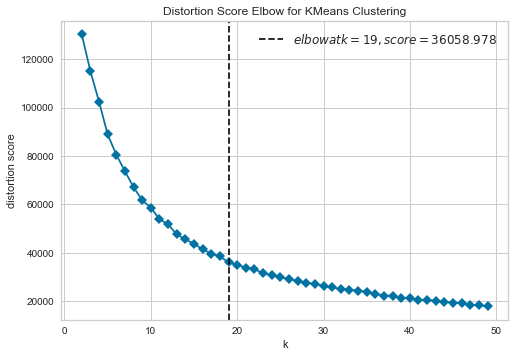

In [64]:
# Elbow method applied with the usual Euclidean metric

visualizer = KElbowVisualizer(model, k=(2,50), timings=False)

visualizer.fit(KMeans_data)
visualizer.show()

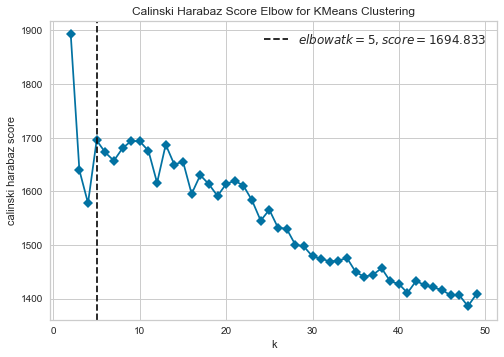

In [65]:
# Elbow method applied with the Calinski-Harabasz metric

visualizer = KElbowVisualizer(model, k=(2,50), metric = 'calinski_harabasz', timings=False)

visualizer.fit(KMeans_data)
visualizer.show()

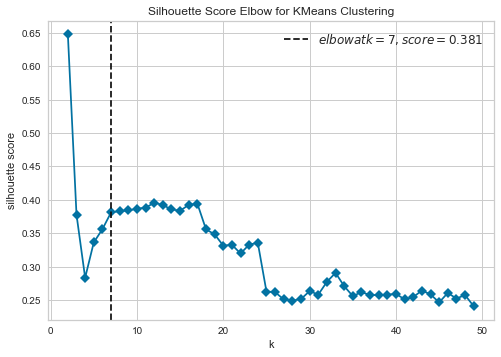

In [66]:
# Elbow method applied with the Silhouette metric

visualizer = KElbowVisualizer(model, k=(2,50), metric = 'silhouette' , timings=False)

visualizer.fit(KMeans_data)
visualizer.show()

**Notes:**

- As observed above, the Calinski_Harabasz and Silhouette metrics do not seem to perform a satisfactory performance, as in both cases the highest score is obtained by only considering only 2 clusters although the suggested number of optimal clusters has been shown differently (n=5 for the Calinski-Harabasz metric and n=7 for the Silhouette metric)! 

- Among the three metrics considered above, the usual Euclidean metric seems to present the most reliable optimal performance. In this case, the optimal number of clusters is 19. 

### 5.2. Finding the Clusters

In [67]:
# Fixing the number of clusters and instantiating k-means

n_cl = 19

k_means = KMeans(n_clusters=n_cl)

k_means.fit(KMeans_data)                            # Fitting the data to k-means algorithm

cluster_numbers = k_means.predict(KMeans_data)      # Cluster numbers

centroids = k_means.cluster_centers_                # Centers of the clusters (each center is a point in R^10)

In [68]:
# Storing the data in a new dataframe with cluster number of each food item

KMeans_df = pca_df.iloc[:,4:14]
KMeans_df['Cluster_Number'] = k_means.labels_ + 1

KMeans_df[id_names] = new_df[id_names]
KMeans_df = KMeans_df.reindex(columns = id_names +['Cluster_Number'] + ['New_Feature_{}'.format(i+1) 
                                                                        for i in range(10)])

In [69]:
# A sample of 3 rows of the new dataframe 'KMean_df'

KMeans_df.sample(3)

,ID,FoodGroup,ShortDescrip,Descrip,Cluster_Number,New_Feature_1,New_Feature_2,New_Feature_3,New_Feature_4,New_Feature_5,New_Feature_6,New_Feature_7,New_Feature_8,New_Feature_9,New_Feature_10
100,1112,Dairy and Egg Products,"WHEY,ACID,FLUID","Whey, acid, fluid",4,-1.764737,0.153012,1.043757,0.237424,0.495326,0.298508,0.176282,-0.557468,-0.251165,-0.164920
1728,7259,Sausages and Luncheon Meats,"LOUIS RICH,TURKEY BREAST (OVEN RSTD,FAT FREE)","LOUIS RICH, Turkey Breast (oven roasted, fat f...",4,-1.405745,0.750004,0.203628,-0.212431,0.756462,0.080238,-0.045823,-0.253404,-0.222307,0.007242
6803,21301,Fast Foods,"FAST FD,PIZZA CHAIN,14"" PIZZA,CHS TOPPING,THIN...","Fast Food, Pizza Chain, 14"" pizza, cheese topp...",19,0.209129,-0.361486,-0.732129,-0.320036,0.460048,-0.192045,0.578153,-0.509208,-0.036528,0.163678


### 5.3. Properties of the K-Means Clusters

**The Sizes of the Clusters**

Let us find the sizes of all k-means clusters in below:

In [70]:
# Finding the sizes of the clusters

cluster_sizes=[]
for i in range(1,n_cl+1):
    cluster_sizes.append(KMeans_df['Cluster_Number'].value_counts()[i])
    print('Number of food elements in cluster number {} ='.format(i), cluster_sizes[i-1], '\n')

Number of food elements in cluster number 1 = 1928 

Number of food elements in cluster number 2 = 899 

Number of food elements in cluster number 3 = 48 

Number of food elements in cluster number 4 = 2947 

Number of food elements in cluster number 5 = 56 

Number of food elements in cluster number 6 = 6 

Number of food elements in cluster number 7 = 203 

Number of food elements in cluster number 8 = 197 

Number of food elements in cluster number 9 = 302 

Number of food elements in cluster number 10 = 147 

Number of food elements in cluster number 11 = 2 

Number of food elements in cluster number 12 = 4 

Number of food elements in cluster number 13 = 3 

Number of food elements in cluster number 14 = 145 

Number of food elements in cluster number 15 = 14 

Number of food elements in cluster number 16 = 589 

Number of food elements in cluster number 17 = 4 

Number of food elements in cluster number 18 = 1 

Number of food elements in cluster number 19 = 1123 



- As observed above, clusters 1, 2, 4, 16, and 19 are responsible for the majority ($87\%$) of the food items ($1928+899+2947+589+1123=7486$ out of $8618$ food items).

- Some very small clusters (clusters 6, 11, 12, 13, 15, 17, 18) will be mostly insignificant in this analysis.

**Food Category Distribution in each Individual Cluster**

Let us find the number of food items in each food category for all of the k-means clusters:

In [71]:
# Finding the number of food items in each food category for each one of the above clusters

for i in range(1,n_cl+1):
    food_group = KMeans_df[KMeans_df['Cluster_Number']==i]['FoodGroup'].value_counts()
    print('\033[1m' + '\033[92m' + '\033[4m' + 'The number of food items in each food category of cluster {} \
(with the total size of {} items) is as follows:\n'.format(i,cluster_sizes[i-1])+'\033[0m',food_group, sep='\n')
    print('\n')

The number of food items in each food category of cluster 1 (with the total size of 1928 items) is as follows:

Beef Products                          798
Lamb, Veal, and Game Products          296
Poultry Products                       276
Pork Products                          265
Finfish and Shellfish Products         177
American Indian/Alaska Native Foods     30
Sausages and Luncheon Meats             25
Legumes and Legume Products             22
Fast Foods                              20
Dairy and Egg Products                   8
Restaurant Foods                         5
Snacks                                   3
Sweets                                   2
Cereal Grains and Pasta                  1
Name: FoodGroup, dtype: int64


The number of food items in each food category of cluster 2 (with the total size of 899 items) is as follows:

Baked Products                         454
Snacks                                 106
Cereal Grains and Pasta                 76
Fast Foods    

## 6. Conclusions and Future Directions

### 6.1. Conclusions

Let us list the key findings of the analysis performed in this project:

 1. Starting from $23$ food nutrients for $8618$ food items, we were able to reduce the number of variables to 10 new features, using the PCA algorithm. In this reduction, we were able to maintain $80\%$ of the total variance.
 
 2. The properties of the 10 new features -- each of which is a linear combination of the old $23$ food nutrients -- were studied in detail. We found to what nutrients each new feature is most sensitive to, and we also found the food category distribution of the 200 richest food items in terms of each of the new feature. 
 
 3. Using the Elbow Method, we figured out the optimal number of k-means clusters for the $8618$ food items. We saw that among the different choices of metric, the usual Euclidean metric provides the most reliable answer to the number of optimal clusters.
 
 4. Finally, we studied the important properties of the k-means clusters. We found the size of each cluster, and we observed that there were a few large clusters as well as some very small insignificant clusters.

### 6.2. Possible Future Directions

It would be interesting to consider the following directions for further future studies:

  1. The PCA analysis we used in this project defines new features as a *linear combination* of the old features. It would be interesting to see if a nonlinear analysis (*e.g.* through Kernel PCA or other means) would provide a way to capture the same (or even a higher) level of variance with less number of new features.
  
  2. It would be interesting to enhance our input dataset by considering different diet habits exercised by different groups of people in order to make predictions about different health characteristics (*e.g.* weight, different diseases such as heart disease and etc.) of the population of the considered group. Clearly, the current dataset is insufficient for that purpose, and this goal can thought as a part of a much wider project with perhaps different scopes.